In [2]:
#FORMAT

diccio = {}
diccio["Nom"] = 'Arnau'
diccio["Guanyat"] = 452
diccio["Gastat"] = 213

frase = "{} ha guanyat {} euros. Pero n'ha gastat {}, quedant-n'hi només {}"
print(frase.format(diccio["Nom"],diccio["Guanyat"],diccio["Gastat"],diccio["Guanyat"]-diccio["Gastat"]))

Arnau ha guanyat 452 euros. Pero n'ha gastat 213, quedant-n'hi només 239


In [6]:
#CSV A DICCIONARI

import csv

%precision 2

with open("./resources/datasets/mpg.csv") as csvfile:
    mpg = list(csv.DictReader(csvfile))

In [18]:
#MITJANA COLUMNA DICCIONARI
print( sum(float(d["cty"]) for d in mpg) / len(mpg) )

#UNIQUE LEVELS D'UN DICCIONARI
manufacturers = set(d["manufacturer"] for d in mpg)

#MITJANES SEGONS EL GRUP
lista = []
for m in manufacturers:
    summ = 0
    typecount = 0
    for d in mpg:
        if d['manufacturer'] == m:
            summ += float(d['cty'])
            typecount += 1
    lista.append((m, summ / typecount))

lista.sort(key=lambda x: x[0])
lista

16.858974358974358


[('audi', 17.61),
 ('chevrolet', 15.00),
 ('dodge', 13.14),
 ('ford', 14.00),
 ('honda', 24.44),
 ('hyundai', 18.64),
 ('jeep', 13.50),
 ('land rover', 11.50),
 ('lincoln', 11.33),
 ('mercury', 13.25),
 ('nissan', 18.08),
 ('pontiac', 17.00),
 ('subaru', 19.29),
 ('toyota', 18.53),
 ('volkswagen', 20.93)]

In [24]:
#LLIBRERIES TIME

import datetime as dt
import time as tm

print(tm.time())
print(dt.datetime.fromtimestamp(tm.time()))
print(dt.timedelta(days = 30, seconds = 5, minutes = 13))

1657109599.1866968
2022-07-06 12:13:19.186877
30 days, 0:13:05


In [30]:
#USE OF MAP
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']
def split_title_and_name(person):
    return person[:3], person[4:]
list(map(split_title_and_name, people))

dictio = {'a': ['1.06', '2.35', '8.11'], 'b': ['3.06', '4.35', '5.11']}
result = map(max, dictio["a"], dictio["b"])
print(list(result))

['3.06', '4.35', '8.11']


In [ ]:
#EXEMPLES LAMBDA
#option 1
for person in people:
    print(split_title_and_name(person) == (lambda x: x.split()[0] + ' ' + x.split()[-1])(person))
#option 2
list(map(split_title_and_name, people)) == list(map(lambda person: person.split()[0] + ' ' + person.split()[-1], people))
#altre_exemple
numbers = (1, 2, 3, 4)
result = map(lambda x: x + x, numbers)

In [32]:
#LIST COMPREHENSION
lista = [number for number in range(0,100) if number % 2 == 0]
print(lista)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


# FUNDAMENTALS OF DATA MANIPULATION

[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


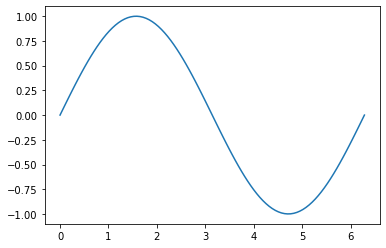

In [4]:
#ALGUNS TIPOS D'ARRAYS

import numpy as np
import matplotlib.pyplot as plt

a = np.arange(10, 50, 2)
print(a)
b = np.linspace(0,1,10)
print(b)

c = np.linspace(0,2*np.pi,100)
#print(c)
plt.plot(c, np.sin(c))

In [ ]:
#quan fem una operacio a una array, es fa a tots els seus elements
#element_wise product = "*" , matric_product (dot_function) = "A@B"

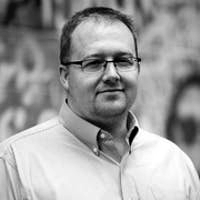

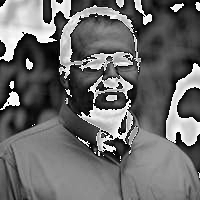

In [8]:
#IMATGES
from PIL import Image
from IPython.display import display

im = Image.open("./resources/week-1/chris.tiff")
display(im)
array_ima = np.array(im) #creacio/creation array

new_array_ima = array_ima - 100
display(Image.fromarray(new_array_ima))

In [12]:
#DATASET PLAYING

wines = np.genfromtxt("./resources/week-1/datasets/winequality-red.csv", delimiter=";", skip_header=1)
wines
wines[:, [0,2,4]]

array([[7.4  , 0.   , 0.076],
       [7.8  , 0.   , 0.098],
       [7.8  , 0.04 , 0.092],
       ...,
       [6.3  , 0.13 , 0.076],
       [5.9  , 0.12 , 0.075],
       [6.   , 0.47 , 0.067]])

# MANIPULATING TEXT WITH REGULAR EXPRESSIONS (REGEX)

In [22]:
import re

text = "This is a good day"

if re.search("good", text):
    print("suuu")
else:
    print(":(")
    
print(re.search("good", text))
print(re.search("good", text).span()) #amb span ens donen els indexos

text10 = "@nltk Text analysis is @awesome! #regex #pandas #python"
text11 = text10.split()
[w for w in text11 if re.search('@[A-Za-z0-9_]+', w)] #paraules d'una llista comencen per '@' i despres va un numero o lletra
    #el + vol dir que sera seguit per one or more times lo que hi ha dins dels brackets

suuu
<re.Match object; span=(10, 14), match='good'>
(10, 14)


['@nltk', '@awesome!']

In [25]:
text = "L'Amy és guapa. Amy juga a volei. Amy és un nom. Amy is in love with Jonah. Jonah loves Amy"

re.split("Amy",text)

len(re.findall("Amy",text))

#si retorna algo es k comença amb L'Amy
re.search("^L'Amy",text)

text = "L'Amy és guapa. Amy juga a volei. Amy és un nom. Amy is in love with Jonah. Jonah loves Amy"

text2 = "AABAABAAAABEBABABEABAAACCAAABAACEABAABAAACBBAACAAABACBACNAAACBAA"
len(re.findall("[A,B]",text2)) #A i B

re.findall("[A][B-C]",text2) #conjunts de AB o AC
re.findall("AB|AC",text2) #conjunts de AB o AC
re.findall("[^A]",text2) #not A
re.findall("^[^A]",text2) #not an A in the beggining
#(quantifiers)
re.findall("A{2,10}", text2) #times student been in bac-to-back A streaks
re.findall("A{2}", text2) #cadenes de AA

#hi ha findall que tenen una r, pero es optatiu

'''
PATTERNS (Patrones busqueda pyhton)
--findall
^ : Comença per / Starts
$ : Acaba per / Ends
[]: '[ñ]' : Conté el caracter/cadena de caracters ñ    'niñ[oa]s'   'cami[oó]n'
[-]: Rangos    '[o-t]'    'Ma[0-3]'    'Ma[0-3A-B]' (doble_rango)
[^]: No cumple la condicion/Negacion   [^France]
[|]: Un caracter o l'altre

*: zero or more
+: at least once or more
?: zero or once
{n}: exactly n times
{n,}: at least n times
{,n}: at most n times
{m,n}: at least m times at most n times

--match (busca només al començament)
(flag(3r_parametre)) re.IGNORECASE - Ignora si es maj o min
. : Comodín punto '.ara'
\b: word boundary
\d : Empieza por numero (any digit)
    \D : NO Empieza por numero (any non digit) == [^0-9]
\s: Any of these [ \t\n\r\f\v]
    \S: Any none of these [ \t\n\r\f\v]
\w: Qualsevol lletra      (  re.sub('[\w]+' ,'', text) )
    \W: Qualsevol no lletra
--search (busca a tota la cedana de text)

re.findall(pattern, string)
dates/fechas pattern: '\d{1,2}[/-]\d{1,2}[/-]\d{2,4}' (NUMERIC VARIANT)
dates/fechas pattern: '(?:\d{1,2} )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}, )?\d{4}' (ALFANUMERIC VARIANT)

'''

['AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA']

In [4]:
with open("resources/week-1/datasets/ferpa.txt") as file:
    wiki = file.read()

for title in re.findall("[\w ]*\[edit\]",wiki): #títols de la wiki page
    print(re.split("[\[]",title)[0])
for item in re.finditer("([\w ]*)(\[edit\])",wiki): #títols de la wiki page (utilitzant group)
    print(item.group(1))
for item in re.finditer("(?P<title>[\w ]*)(?P<edit_link>\[edit\])",wiki): #títols de la wiki page (item groupdict)
    print(item.groupdict())

Overview
Access to public records
Student medical records
Overview
Access to public records
Student medical records
{'title': 'Overview', 'edit_link': '[edit]'}
{'title': 'Access to public records', 'edit_link': '[edit]'}
{'title': 'Student medical records', 'edit_link': '[edit]'}


In [7]:
with open("resources/week-1/datasets/buddhist.txt") as file:
    wiki = file.read()
    
#LARGE REGEX
pattern="""
(?P<title>.*)      #a
(-\ located\ in\ ) #b
(?P<city>\w*)      #c
(,\ )              #d
(?P<state>\w*)     #e"""

for item in re.finditer(pattern,wiki,re.VERBOSE):
    print(item.groupdict())
    
pattern = re.compile("o")
print("1",pattern.match("dog"))      # No match as "o" is not at the start of "dog".
print("2",pattern.match("dog", 1))

1 None
2 <re.Match object; span=(1, 2), match='o'>


In [50]:
#display hashtags
with open("resources/week-1/datasets/nytimeshealth.txt") as file:
    health = file.read()
    
pattern = '#[\w\d]*(?=\s)'
re.findall(pattern, health)

['#askwell',
 '#pregnancy',
 '#Colorado',
 '#VegetarianThanksgiving',
 '#FallPrevention',
 '#Ebola',
 '#Ebola',
 '#ebola',
 '#Ebola',
 '#Ebola',
 '#EbolaHysteria',
 '#AskNYT',
 '#Ebola',
 '#Ebola',
 '#Liberia',
 '#Excalibur',
 '#ebola',
 '#Ebola',
 '#dallas',
 '#nobelprize2014',
 '#ebola',
 '#ebola',
 '#monrovia',
 '#ebola',
 '#nobelprize2014',
 '#ebola',
 '#nobelprize2014',
 '#Medicine',
 '#Ebola',
 '#Monrovia',
 '#Ebola',
 '#smell',
 '#Ebola',
 '#Ebola',
 '#Ebola',
 '#Monrovia',
 '#Ebola',
 '#ebola',
 '#monrovia',
 '#liberia',
 '#benzos',
 '#ClimateChange',
 '#Whole',
 '#Wheat',
 '#Focaccia',
 '#Tomatoes',
 '#Olives',
 '#Recipes',
 '#Health',
 '#Ebola',
 '#Monrovia',
 '#Liberia',
 '#Ebola',
 '#Ebola',
 '#Liberia',
 '#Ebola',
 '#blood',
 '#Ebola',
 '#organtrafficking',
 '#EbolaOutbreak',
 '#SierraLeone',
 '#Freetown',
 '#SierraLeone',
 '#ebolaoutbreak',
 '#kenema',
 '#ebola',
 '#Ebola',
 '#ebola',
 '#ebola',
 '#Ebola',
 '#ASMR',
 '#AIDS2014',
 '#AIDS',
 '#MH17',
 '#benzos']

In [9]:
string = "La meva iaia es diu Antonia."
#detectar paraules majuscules (no al començament)
names_list = re.findall(r'(?<!^)(?<!\. )[A-Z][a-z]+',string)
print(names_list)

#detectar paraules majuscules (qyalsevol lloc)
[w for w in string if w.istitle()] # Capitalized words in text2

['Antonia']


In [ ]:
with open("resources/week-1/datasets/nytimeshealth.txt") as file:
    health = file.read()

for item in re.finditer("(?P<title>[\w ]*)(?P<edit_link>\[edit\])",wiki): #títols de la wiki page (item groupdict)
    print(item.groupdict())

In [ ]:
cities[cities['NHL'].str.contains(variable)== True] #busqueda/busca en un pandas df
matches = cities[cities['MLB'].str.contains(team2)].index.to_list() #llista amb indexs/indices que contenen la paraula

In [ ]:
pattern = r'([0-9]{2}\/[0-9]{2}\/[0-9]{4})'
#df.iat fa que la pandas df sigui com una array numpy alhora de serhi accedida
for row in range(0, len(df)):
    date = re.search(pattern, df.iat[row, numeric_index]).group()

# PANDAS

In [2]:
import pandas as pd

s = pd.Series(["Physics", "Chemistrt", "English"] , index=["Alice", "Jack", "Molly"])

students_scores = {"Alice": "Physyics",
                  "Max": "Maths",
                  "John": "English"}
s2 = pd.Series(students_scores, index = ["Alice", "Max", "Lola"])
print(s2)
print(s2.loc["Max"], s2.iloc[1]) #loc es per l'index

#amb iloc nomes es poden utilitzar integers, amb loc si es poden utilitzar strings

#es recomana utilitzar les operacions np.sum, np.mean ... (no fer bucles for)

#per afegir dades a un pandas dataset, es fa amb append

print(s2.values, s2.index)

Alice    Physyics
Max         Maths
Lola          NaN
dtype: object
Maths Maths
['Physyics' 'Maths' nan] Index(['Alice', 'Max', 'Lola'], dtype='object')


In [4]:
#pandas dataframe

#MANERA 1
r1 = pd.Series({"Name": "Alice",
               "Age": 20,
               "Sex": "Female"})
r2 = pd.Series({"Name": "Bob",
               "Age": 30,
               "Sex": "Male"})
r3 = pd.Series({"Name": "Bernardo",
               "Age": 25,
               "Sex": "Male"})
s = pd.Series(llista_prob, index=list(X_test.index)) #crear series part2

#tmb ho podem tenir tot previament junt a una llista de diccionaris
df = pd.DataFrame([r1,r2,r3],index=["School1", "School2", "School3"]) #crear
df

#MANERA2
pokemon = ["Arceus", "Pikachu", "Magikarp", "Chikorita", "Thyplosion", "Gardevoir"]
tipus = ["Normal", "Eléctrico", "Agua", "Planta", "Fuego", "Psíquico"]
pok_tuple = list(zip(pokemon,tipus))
df = pd.DataFrame(pok_tuple, columns = ["Pok", "Type"])
df

#MANERA3
dicc_listes = {'Company': ['hp', 'ibm', 'intel', 'microsoft', 'amazon', 'apple'],
              'Headquarters': ['CAL', 'NY', 'CAL', 'WAS', 'WAS', 'CAL'], 
              'CEO': ['Arnau Garriga', 'James Arthur', 'Carmen Mola', 'El Bicho', 'Tomàs Molina', 'Vladimir Putin']}
df = pd.DataFrame(dicc_listes)
df

#I HI HA MES MANERES...

df.iloc[2:6 , 3:7] #seleccio files/columnes amb iloc

'''
del df["columna"] #eliminar una columna
df["columna"] = None #afegir una columna
df_x = df[["col1","col3","col5"]]

index = df.columns.get_loc('Age') #get index of a column by name
df = df[['Sex', 'Name', 'Age']] #reorganitzar ordre columnes (rearrange)
'''

'\ndel df["columna"] #eliminar una columna\ndf["columna"] = None #afegir una columna\ndf_x = df[["col1","col3","col5"]]\n\nindex = df.columns.get_loc(\'Age\') #get index of a column by name\ndf = df[[\'Sex\', \'Name\', \'Age\']] #reorganitzar ordre columnes (rearrange)\n'

In [29]:
#indexing

df["Serial No."] = df.index #retorna el valor de l'index
df = df.set_index("chance of admit")
df.head()
df.describe() #informacio estadistica de les columnes
df.info() #informacio dels tipus i nulls de les columnes
df = df.reset_index()

df = df.loc[(df.index.get_level_values("Date") > '2018-03-01')] #index+filter
df = df.loc[:14, ["Name", "Join Date"]] #15 primeres files i 2 columnes especificades

df2 = pd.read_csv("resources/week-2/datasets/census.csv")
df2 = pd.read_csv("resources/week-2/datasets/census.csv", sep = "\t")
df2 = pd.read_csv("resources/week-2/datasets/census.csv", Index = False)
df = pd.read_csv('readonly/train.csv', encoding = "ISO-8859-1") #si no funciona
nom_variable.to_csv('census.csv') #guardar/save dataframe a un csv
nom_variable.to_excel('census.xlsx', index=False) #guardar/save dataframe a un xlsx
nom_variable.to_json('census.json', index=False) #guardar/save dataframe a un json
nom_variable.to_html('census.html', index=False) #guardar/save dataframe a un html
nom_variable.to_csv('census.csv', sep = "\t") #guardar/save dataframe a un csv (tab delimited)
nom_variable.to_csv('census.txt', sep = "\t") #guardar/save dataframe a un txt (tab delimited)

#sklearn.dataset to pandas dataframe
data1 = pd.DataFrame(data= cancer.data,columns= cancer.feature_names)  
data1["target"] = cancer.target
    
df2.shape #mida
energy = pd.read_excel() #read_excel
#exclude footer and header ( header=None, footer=None )
df2["SUMLEV"].unique() #unics (com un set) (el resultat es una numpy array) DISTINCT
df2 = df2[df2["SUMLEV"] == 50]

df2 = df2.set_index(["STNAME","CTYNAME"]) #MULTIINDEX (HIERARCHICAL)
df2.loc["Alabama","Bibb County"] #aquests 2
df2.loc["Alabama" : "Earl County" , :] #entre aquests 2
df2.loc[[("Alabama","Bibb County"), #multiple indices
       ("Michigan","Wayne County")]]

,,SUMLEV,REGION,DIVISION,STATE,COUNTY,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,Bibb County,50,3,6,1,7,22915,22919,22861,22733,22642,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Michigan,Wayne County,50,2,3,26,163,1820584,1820641,1815199,1801273,1792514,...,-13.340073,-10.271616,-14.119617,-11.903253,-8.762835,-11.344758,-8.098421,-11.732437,-9.161648,-6.010195


In [19]:
#READING A NEW FILE


df = pd.read_csv("resources/week-2/datasets/Admission_Predict.csv", index_col=0)
    #a index_col s'hi posen o una columna que sera l'index o una llista de columnes

new_df = df.rename(columns={'Chance of Admit ':'Chance of Admition'}) #se que hi ha un espai pk he fet df.columns
df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4'] #rename all columns
print(new_df.head())

cols = list(df.columns)
cols = [x.lower().strip() for x in cols]
df.columns = cols
df.head()

#filtrar / filter
admit_mask = df["chance of admit"] > 0.7
df.where(admit_mask).dropna().head()
df.loc[df['chance of admit'] > 0.7] #altre manera
df[df['chance of admit'] > 0.7] #millor manera diria
df.loc[df['brand_name'].isin(['A','B','C'])] #multiple filtre en una mateixa columna
df[(df['chance of admit'] > 0.7) & (df['chance of geta'] < 0.5)] #doble filtre (AND)
df[(df['chance of admit'] > 0.7) | (df['chance of geta'] < 0.5)] #doble filtre (OR)
df[~(df['chance of admit'] == 'FIVE')] #NOT (NEGATION)
df[df['columna1'] == 'Null'].index.values #indexs amb un cert valor

#drop columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True) #by index
df.drop(["A", "B"]], axis=1, inplace=True) #by name
new_df = df.filter('col1','col2','col2', axis=1)
new_df = df[['col1','col2','col2']]

#add row / afegir fila
df2 = {'First Name': 'Vikram', 'Last Name': 'Aruchamy', 'Country': 'India'} #manera1
df2 = ['Vikram', 'Aruchamy', 'India'] #manera2
df = df.append(df2, ignore_index = True) #manera1
df = pd.concat([df,df2], 1)
df.loc[-1] = df2 #manera2 (tindrà d'index -1 :())
    #solucio: df.index = df.index + 1   /   df = df.sort_index()  /   df = df.sort_index(axis=1) (ordenar columnes)

#drop/eliminar/delete files/rows
X_train = X_train.drop(X_train.index[nulls]) #per index
    
#remove duplicates
import pandas as pd
data.sort_values("First Name", inplace = True)
data.drop_duplicates(subset ="First Name", keep = False, inplace = True)

#multiple condition mask
(df["chance of admit"] > 0.7) & (df["chance of admit"] < 0.9)
df["chance of admit"].gt(0.7).lt(0.9)
df[df['chance of admit'].gt(0.7) & df['chance of admit'].lt(0.9)]
df[(df['chance of admit'] > 0.7) & (df['chance of admit'] < 0.9)]
df.columns
df.T[1]

In [1]:
import pandas as pd
 
# making data frame from csv file
data = pd.read_csv("employees.csv")
 
# sorting by first name
data.sort_values("First Name", inplace = True)
 
# dropping ALL duplicate values
data.drop_duplicates(subset ="First Name",
                     keep = False, inplace = True)
 
# displaying data
data

FileNotFoundError: [Errno 2] File b'employees.csv' does not exist: b'employees.csv'

In [22]:
#missing values
dff = pd.read_csv("resources/week-2/datasets/class_grades.csv")
float("NaN") #assign/define a NaN
delete = dff.dropna() #eliminar files amb NaNs
delete = dff.dropna(1) #eliminar columnes amb NaNs
delete = dff.replace(np.nan, 0)
dff.dropna(subset=['HAD_CPOX', 'P_NUMVRC']) #eliminar files amb NaNs a determinades columnes
replace = dff.fillna(0, inplace=True) #canviar els valors de NaN per 0
#dff.is_null()   #dff.is_null().sum()   #dff['col1'].is_null()  (inversa en notnull())

dfff = pd.read_csv("resources/week-2/datasets/log.csv")
dfff = dfff.set_index(['time', 'user']) #multiple index (multiindex)
dfff.xs('BMW') #torna tots els elements on l'index primer es bmw
dfff.xs('BMW', level='user') #torna tots els elements on l'index segon es bmw
dfff = dfff.sort_index()
dfff = dfff.fillna(method="ffill")
dfff.replace([5,6], [500,600]) #prelaçar els numeros de l'esuqerra pel de la dreta 5->500, 6->600
dfff.replace(',', '.').astype(float)
dfff.replace({False: 0, True: 1}, inplace=True) #canviar tipus boolea
energy["Country"] = energy["Country"].replace() #MILLOR EXEMPLE PK FUNCIONI EL REPLACE
dfff.head(8)

pattern = ".*.html$"
dfff.replace(to_replace=pattern, value="webpage", regex=True) #regex

serie.sort_values(ascending=False) #sort pandas serie (order)
df.sort_values(by='xx', ascending=False) #sort panda serie dataframe (order)
df.sort_values(['xx','yy'], ascending=False) #sort panda serie dataframe (order)
df.sort_values(['xx','yy'], ascending=[True,False]) #sort panda serie dataframe (order)

video  playback position  paused  volume
time       user                                              
1469974424 cheryl  webpage                  5   False    10.0
           sue     webpage                 23   False    10.0
1469974454 cheryl  webpage                  6   False    10.0
           sue     webpage                 24   False    10.0
1469974484 cheryl  webpage                  7   False    10.0
1469974514 cheryl  webpage                  8   False    10.0
1469974524 sue     webpage                 25   False    10.0
1469974544 cheryl  webpage                  9   False    10.0
1469974554 sue     webpage                 26   False    10.0
1469974574 cheryl  webpage                 10   False    10.0
1469974604 cheryl  webpage                 11   False    10.0
1469974624 sue     webpage                 27   False    10.0
1469974634 cheryl  webpage                 12   False    10.0
1469974654 sue     webpage                 28   False     5.0
1469974664 cheryl  webpage                 13   False     5.0
1469974694 cheryl  webpage                 14   False     5.0
1469974724 cheryl  webpage                 15   False     5.0
           sue     webpage                 29   False     5.0
1469974754 sue     webpage                 30   False     5.0
1469974824 sue     webpage                 31   False     5.0
1469974854 sue     webpage                 32   False     5.0
1469974924 sue     webpage                 33   False     5.0
1469977424 bob     webpage                  1    True    10.0
1469977454 bob     webpage                  1    True    10.0
1469977484 bob     webpage                  1    True    10.0
1469977514 bob     webpage                  1    True    10.0
1469977544 bob     webpage                  1    True    10.0
1469977574 bob     webpage                  1    True    10.0
1469977604 bob     webpage                  1    True    10.0
1469977634 bob     webpage                  1    True    10.0
1469977664 bob     webpage                  1    True    10.0
1469977694 bob     webpage                  1    True    10.0
1469977724 bob     webpage                  1    True    10.0

In [29]:
#example

"""manera1
df = pd.read_csv("resources/week-2/datasets/presidents.csv")
df["First"] = df["President"]
df["First"] = df["First"].replace(to_replace="[ ].*", value="", regex=True)
"""

"""manera2
def spiltname(row):
    row["First"] = row["President"].split(" ")[0]
    row["Last"] = row["President"].split(" ")[-1]
    return row
df = df.apply(splitname, axis="columns") #amb apply fas un canvia a cada fila
"""

pattern = "(^[\w]*)(?:.* )([\w]*$)"
df["President"].str.extract(pattern)

pattern = "(?P<First>^[\w]*)(?:.* )(?P<Last>([\w]*$)"
#df["President"].str.extract(pattern)
#df["Born"] = df["Born"].str.extract("([\w]{3} [\w]{1,2}, [\w]{4})") #nomes ens quedem amb les dates amb el pattern month day, year correcte
df["Born"]= pd.to_datetime(df["Born"])
df["Born"]

0    1732-02-22
1    1735-10-30
2    1743-04-13
3    1751-03-16
4    1758-04-28
5    1767-07-11
6    1767-03-15
7    1782-12-05
8    1773-02-09
9    1790-03-29
10   1795-11-02
11   1784-11-24
12   1800-01-07
13   1804-11-23
14   1791-04-23
15   1809-02-12
16   1808-12-29
17   1822-04-27
18   1822-10-04
19   1831-11-19
20   1829-10-05
21   1837-03-18
22   1833-08-20
23   1837-03-18
24   1843-01-29
25   1858-10-27
26   1857-09-15
27   1856-12-28
28   1865-11-02
29   1872-07-04
30   1874-08-10
31   1882-01-30
32   1884-05-08
33   1890-10-14
34   1917-05-29
35   1908-08-27
36   1913-01-09
37   1913-07-14
38   1924-10-01
39   1911-02-06
40   1924-06-12
41   1946-08-19
42   1946-07-06
43   1961-08-04
Name: Born, dtype: datetime64[ns]

In [40]:
import pandas as pd
s1 = pd.Series({1: 'Alice', 2: 'Jack', 3: 'Molly'})
s2 = pd.Series({'Alice': 1, 'Jack': 2, 'Molly': 3})

s2.loc[1]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [ ]:
#proporcio de dades d'una columna
df = pd.read_csv("assets/NISPUF17.csv")
dicc = {}
counts = df["EDUC1"].value_counts() #frequency / most
dicc["less than high school"] = counts.loc[1]/len(df)
dicc["high school"] = counts.loc[2]/len(df)
dicc["more than high school but not college"] = counts.loc[3]/len(df)
dicc["college"] = counts.loc[4]/len(df)

In [ ]:
#MERGING DATAFRAMES
pd.merge(staff_df, student_df, how="outer", left_index=True, right_index=True) #tots
pd.merge(staff_df, student_df, how="inner", left_index=True, right_index=True) #nomes els de la interseccio
pd.merge(staff_df, student_df, how="left", left_index=True, right_index=True) #nomes els de staff_df
pd.merge(staff_df, student_df, how="right", left_index=True, right_index=True) #nomes els de student_df
pd.merge(staff_df, student_df, how="outer", on='Name') #Name serà una columna (previament haurem de fer un reset_index dels 2 dfs)
#si tenim columnes amb el mateix nom pero k no coincideixen els sue valors, es crearan 2 columnes (..._x i ..._y)
pd.merge(staff_df, student_df, how="outer", on=['First Name', 'Last Name']) #quan la key son multiples columnes
#merge multiple dfs (mes de 2)
dfs = [energy, GDP, ScimEn]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='right'), dfs).fillna('none')

In [4]:
%%capture
df_2011 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2011_12_PP.csv", error_bad_lines=False)
df_2012 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2012_13_PP.csv", error_bad_lines=False)
df_2013 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2013_14_PP.csv", error_bad_lines=False)

frames = [df_2011,df_2012,df_2013]
pd.concat(frames)
pd.concat(frames, axis=1) #afegira columnes
pd.concat(frames, keys=['2011','2012','2013'])
pd.concat(frames, ignore_index=True)

In [7]:
#idioms
import pandas as pd
import timeit
import numpy as np

df = pd.read_csv("resources/week-3/datasets/census.csv")

(df.where(df['SUMLEV']==50) #pandorable. millor herho normal
    .dropna()
    .set_index(["STNAME","CTYNAME"])
    .rename(columns={'ESTIMATESBASE2010': "Estimates base 2010"}))


rows = ["POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015"]
#df.apply(lambda x: np.max(x[rows]), axis=1).head() #LAMBDA + APPLY
df['AVG'] = df[rows].apply(lambda z: np.mean(z), axis=1)
result_df = df.drop(rows,axis=1)
result_df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,NPOPCHG_2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,AVG
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,5034,...,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4.823047e+06
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,89,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,5.512717e+04
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,928,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,1.931327e+05
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,-116,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,2.700050e+04
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,-58,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,2.264667e+04
5,50,3,6,1,9,Alabama,Blount County,57322,57322,51,...,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,5.765417e+04
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,-28,...,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,1.071250e+04
7,50,3,6,1,13,Alabama,Butler County,20947,20946,-2,...,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,2.045267e+04
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,-149,...,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,1.169465e+05
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,-72,...,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,3.408233e+04


In [13]:
def update_merged_with_zones(path):
    Central_South_America = ["Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Bolivia", "Brazil", "Colombia", 
    "Costa Rica", "Cuba", "Dominica", "El Salvador", "Ecuador", "Grenada", "Guatemala", "Haiti", 
    "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Dominican Republic", "Saint Kitts and Nevis",
    "Trinidad and Tobago", "Uruguay", "Venezuela", "Chile", "Colmbia", "Jamaica", "Belize"]
    Welfare_Countries = ["Germany", "Andorra", "Australia", "Austria", "Belgium", "Canada", "South Korea", "Denmark", 
        "Spain", "United States of America", "Finland", "France", "Greece", "Ireland", "Iceland", "Italy", "Japan", 
        "Luxembourg", "Malta", "Norway", "New Zealand", "Netherlands", "Poland" , "Portugal", "United Kingdom", 
        "Sweden", "Switzerland", "Czech Republic"]
    Africa = ["Angola", "Botswana", "Burkina Faso", "Cameroon", "Cape Verde", "Congo", "Ivory Coast", "Djibouti", "Ethiopia", 
        "Gabon", "Gambia", "Ghana", "Equatorial Guinea", "Guinea-Bissau", "Kenya", "Liberia", "Malawi", "Mali", "Mauritania", "Mozambique",
        "Namibia", "Niger", "Nigeria", "Central African Republic", "Rwanda", "Senegal", "Somalia", "South Africa", 
        "Sudan", "Tanzania", "Togo", "Uganda", "Zimbabwe", "Guinea", "Zambia", "Sierra Leone", "Sudan,",
        "Madagascar", "Benin", "Mauritius", "Burundi", "Eritrea", "Seychelles", "Chad"]
    if x in Central_South_America:
        return "Central_South_America"
    elif x in Welfare_Countries:
        return "Welfare_Countries"
    elif x in Africa:
        return "Africa"
    
df['region'] = df['country'].apply(lambda x: update_merged_with_zones(x)) #crear columna nova sobre una classificacio/regio

In [ ]:
#distribuicó / dustribution column/variable
import plotly.express as px
fig = px.box(data, y='SUM_SUMMARY_AMOUNT_CHECK')
fig.show()

#random/sample (randomly select rows)
df.sample(5, random_state=0)

## GROUPBY

In [14]:
df = pd.read_csv("resources/week-3/datasets/census.csv")
df = df[df["SUMLEV"] == 50]

'''metode1
for state in df["STNAME"].unique():
    avg = np.average(df.where(df["STNAME"]==state).dropna()["CENSUS2010POP"])
    print("Counties in state", state, "with an average population of", avg)
'''
'''metode2 (millor)
for group, frame in df.groupby("STNAME"):
    avg = np.average(frame["CENSUS2010POP"])
    print("Counties in state", state, "with an average population of", avg)
'''

for group, frame in df.groupby(function): #no need to pass a column

Counties in state Alabama with an average population of 71339.34328358209
Counties in state Alaska with an average population of 24490.724137931036
Counties in state Arizona with an average population of 426134.4666666667
Counties in state Arkansas with an average population of 38878.90666666667
Counties in state California with an average population of 642309.5862068966
Counties in state Colorado with an average population of 78581.1875
Counties in state Connecticut with an average population of 446762.125
Counties in state Delaware with an average population of 299311.3333333333
Counties in state District of Columbia with an average population of 601723.0
Counties in state Florida with an average population of 280616.5671641791
Counties in state Georgia with an average population of 60928.63522012578
Counties in state Hawaii with an average population of 272060.2
Counties in state Idaho with an average population of 35626.86363636364
Counties in state Illinois with an average populat

In [2]:
df = pd.read_csv("resources/week-3/datasets/listings.csv")
df = df.set_index(["cancellation_policy","review_scores_value"]) #multiindex

for group, frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


In [1]:
np.nanstd(5)

NameError: name 'np' is not defined

In [7]:
#AGGREGATION
df = df.reset_index()
df.groupby("cancellation_policy").agg({"review_scores_value":np.average}) #amb aggregate acabes amb one value per column
df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean}) #excludes nans
df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean, np.nanstd),
                                       "reviews_per_month": np.nanmean}) #multiple means/std at a time

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

In [8]:
#TRANSFPRMATION
cols = ["cancellation_policy","review_scores_value"]
transform_df = df[cols].groupby("cancellation_policy").transform(np.nanmean) #crea/transforma un df amb les mitjanes
df = df.merge(transform_df, left_index=True, right_index=True) #afegim la nova dataframe/columna
df.head()

,cancellation_policy,review_scores_value_x,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_scores_value_y
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,9.0,f,NaN,NaN,f,t,f,1,0.47,9.307398
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,f,NaN,NaN,f,f,f,1,1.00,9.307398
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,9.0,f,NaN,NaN,f,f,f,1,2.25,9.237421


In [10]:
#FILTERING
df.groupby("cancellation_policy").filter(lambda x: np.nanmean(x['review_scores_value_x'])>9.2)

#APPLYING (util per quan els df no son huge)
df = df[["cancellation_policy","review_scores_value_x"]]
def func(group):
    avg = np.nanmean(group['review_scores_value_x'])
    group['review_scores_mean'] = np.abs(avg-group['review_scores_value_x'])
    return group

df.groupby("cancellation_policy").apply(func).head()

#altre exemple groupby
df2 = df.groupby("cancellation_policy")[['Country', 'Confirmed', 'Deaths']].sum() #al df3 tindra les 3 columnes country,confirmed i deaths

#si els mean o std no funcione, utilitzar ", dtype='float32'" ex: np.nanmean(x['review_scores_value_x'])>9.2 , dtype='float32')

,cancellation_policy,review_scores_value_x,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


## SCALES

In [ ]:
df["Grades"].astype("category").head() #change types
my_catgories = pd.CategoricalDtype(catgories=[...], ordered=True) #be aware of the oreder of the categories
grades = df["Grades"].astype(my_catgories)
grades[grades>"C"] #aleshores podriem fer aixo

nhl_df = nhl_df.astype({'W':'int','L':'int'}) #aquesta manera tmb funciona per canviar el type

In [16]:
#CUT INTO BINS
df = pd.read_csv("resources/week-3/datasets/census.csv")
df = df[df["SUMLEV"] == 50]
df = df.set_index("STNAME").groupby(level=0)["CENSUS2010POP"].agg(np.average)
pd.cut(df,10) #separa en 10 grups

Top15 = Top15.groupby(['Bins', 'Continent'])['% Renewable'].count()  #count n_elem in each group

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [19]:
#PIVOT TABLE
df = pd.read_csv("resources/week-3/datasets/cwurData.csv")

def create_category():
    pass #funcio que segons el ranking classificara el registre d'un tipus o un altre

df['rank_level'] = df['world_rank'].apply(lambda x: create_category(x)) #crear columna nova sobre una classificacio/regio

#RESHAPE/REORIENT PANDAS DF
piivot = df.pivot(values="score", index="country", columns="rank_level"

df.pivot_table(values="score", index="country", columns="rank_level", aggfunc=[np.mean]) #nova columna
df.pivot_table(values="score", index="country", columns="rank_level", aggfunc=[np.mean, np.max]) #noves columnes
new_df = df.pivot_table(values="score", index="country", columns="rank_level", aggfunc=[np.mean, np.max], margins=True) #marginal values
new_df["mean"]["First Tier University"].idxmax() #màxim
new_df = new_df.stack() #es fa una transposicio pk hi hagi 2 indexs
new_df = new_df.unstack() #es fa una transposicio pk hi hagi 2 classificacions de columnes
new_df = new_df.melt(id_vars= ['region','type','date'], value_vars = ['AveragePrice', 'Total Volume']) #un df on cada row es una combinacio dels possibles valors de cada variable d'id_vars

TypeError: create_category() takes 0 positional arguments but 1 was given

## TIME

In [8]:
#TIMESTAMP
pd.Timestamp("9/1/2019 10:05AM")
pd.Timestamp("2019-09-01")
pd.Timestamp(2019, 12, 20, 0, 0)
pd.Timestamp(2019, 12, 11, 0, 0).isoweekday() #dia de la setmana
pd.Timestamp(2019, 12, 11, 10, 5, 53).minute #dia de la setmana

5

In [10]:
#PERIOD
pd.Period('1/2016')
pd.Period('1/2016') + 5 #util per les operacions
pd.Period('01/12/2019', 'M') + 5  #afageix 5 mesos

Period('2019-06', 'M')

In [13]:
#DATETIMEINDEX & PERIODINDEX
t1 = pd.Series(list("abc"), [pd.Timestamp("2019-09-01"), pd.Timestamp("2019-09-02"), pd.Timestamp("2019-09-03")])
print(t1, t1.index)

2019-09-01    a
2019-09-02    b
2019-09-03    c
dtype: object DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03'], dtype='datetime64[ns]', freq=None)


In [18]:
#TO_DATETIME (PERMET POSAR TOTES LES DATES A UN MATEIX FORMAT)

d1 = ["2019-09-01", "9/1/2019", "2 June 2013", "Aug 5, 2021"]
ts3 = pd.DataFrame(np.random.randint(10,100,(4,2)), index=d1,
                                    columns = list("ab"))
ts3.index = pd.to_datetime(ts3.index)
ts3
pd.to_datetime("4.7.12", dayfirst=True) #european

Timestamp('2012-07-04 00:00:00')

In [23]:
#TIMEDELTA
pd.Timestamp("2019-09-01") - pd.Timestamp("2019-05-04")
pd.Timestamp("2019-09-01") + pd.Timedelta("120D 13H 5M")

Timestamp('2019-12-30 13:05:00')

In [9]:
#OFFSET
pd.Timestamp("2019-09-01") + pd.offsets.Week() #afegir una setmana
pd.Timestamp("2019-09-01") + pd.offsets.MonthEnd() #ultim dia del mes

Timestamp('2019-09-30 00:00:00')

In [35]:
#DATES IN A DATAFRAME

dates = pd.date_range("10-01-2016", periods = 9, freq='2W-SUN') #5 periodes cada 2 diumenges
pd.date_range("10-01-2016", periods = 7, freq='B') #B = business days
pd.date_range("10-01-2016", periods = 7, freq='QS-JUN') #QS-JUN = Quarter start june

df = pd.DataFrame({'a': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'b': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df.index.weekday_name #dies de la setmana en format str

df.resample("M").mean() #agrupa i resumeix per cada mes
df['2017'] #any concret
df['2016-11'] #mes concret
df['2016-12-13':] #a partir d'un dia concret

,a,b
2016-12-25,109,122
2017-01-08,109,126
2017-01-22,105,120


# TESTINGS

In [6]:
import numpy as np
import pandas as pd
from scipy import stats #nova / new

df = pd.read_csv("resources/week-4/datasets/grades.csv")

early_finishers = df[pd.to_datetime(df['assignment1_submission']) < '2016']
late_finishers = df[~df.index.isin(early_finishers.index)] #dataframe que tingui lo que no te l'altre (contrari, opposite, invers)


#first t.text example
stats.ttest_ind(early_finishers["assignment1_grade"], late_finishers["assignment1_grade"])
    #p_value(0.18) > alpha(0.05) / We can't reject the H0 -> We can't say that the grades are different / No es estadisticament significatiu

Ttest_indResult(statistic=1.322354085372139, pvalue=0.1861810110171455)

In [27]:
df1 = pd.DataFrame([np.random.random(100) for x in range(100)]) #creating random_df with List Comprehension
df2 = pd.DataFrame([np.random.random(100) for x in range(100)])

def test_columns(alpha=0.1):
    num_diff = 0
    for col in df1.columns:
        tteststat, pval = stats.ttest_ind(df1[col], df2[col])
        if pval <= alpha:
            print("col {} is statistically signifcantly different".format(col)) #printejar guai
            num_diff += 1
    print(num_diff, num_diff/100)
    
test_columns()
test_columns(0.05)

df2 = pd.DataFrame([np.random.chisquare(df=1,size=100) for x in range(100)]) #non_normal_distribution
test_columns(0.05)

col 4 is statistically signifcantly different
col 10 is statistically signifcantly different
col 12 is statistically signifcantly different
col 14 is statistically signifcantly different
col 18 is statistically signifcantly different
col 20 is statistically signifcantly different
col 33 is statistically signifcantly different
col 44 is statistically signifcantly different
col 58 is statistically signifcantly different
col 64 is statistically signifcantly different
col 67 is statistically signifcantly different
col 79 is statistically signifcantly different
col 85 is statistically signifcantly different
col 88 is statistically signifcantly different
col 91 is statistically signifcantly different
col 96 is statistically signifcantly different
col 97 is statistically signifcantly different
col 99 is statistically signifcantly different
18 0.18
col 4 is statistically signifcantly different
col 12 is statistically signifcantly different
col 14 is statistically signifcantly different
col 20 

In [33]:
np.random.chisquare(1,4)

array([0.08816438, 1.02716169, 1.39975649, 2.48294976])

In [9]:
#distribution of a variable
plt.plot(df["Grades"].values)
plt.show()

<re.Match object; span=(0, 1), match='A'>

In [18]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
S[['b', 'c', 'd']]

b    1
c    2
d    3
dtype: int64

In [16]:
#iterar files pandas df
for row in df.itertuples():
    print(row, row.CEO)
print('')
for row_index, row in df.iterrows():
    print(row_index)
    print(row)
    print(row[2])
print('')
for key,value in df.iteritems():
    print(key)
    print(value)

Pandas(Index=0, Company='hp', Headquarters='CAL', CEO='Arnau Garriga') Arnau Garriga
Pandas(Index=1, Company='ibm', Headquarters='NY', CEO='James Arthur') James Arthur
Pandas(Index=2, Company='intel', Headquarters='CAL', CEO='Carmen Mola') Carmen Mola
Pandas(Index=3, Company='microsoft', Headquarters='WAS', CEO='El Bicho') El Bicho
Pandas(Index=4, Company='amazon', Headquarters='WAS', CEO='Tomàs Molina') Tomàs Molina
Pandas(Index=5, Company='apple', Headquarters='CAL', CEO='Vladimir Putin') Vladimir Putin

0
Company                    hp
Headquarters              CAL
CEO             Arnau Garriga
Name: 0, dtype: object
Arnau Garriga
1
Company                  ibm
Headquarters              NY
CEO             James Arthur
Name: 1, dtype: object
James Arthur
2
Company               intel
Headquarters            CAL
CEO             Carmen Mola
Name: 2, dtype: object
Carmen Mola
3
Company         microsoft
Headquarters          WAS
CEO              El Bicho
Name: 3, dtype: object
El Bicho
4

## Relational DB

In [ ]:
import pandas as pd
import sys
import sqlite3

connection = sqlite3.connect('/.datasets/empData.db')
cursor = connection.cursor()

emp_table = '''CREATE TABLE Persons (
    PersonID int,
    LastName varchar(255),
    FirstName varchar(255),
    Address varchar(255),
    City varchar(255)
);'''
cursor.execute(emp_table)

insert_emp = '''INSERT INTO Persons VALUES ('ID_1', 'Erichsen', 'Jack', 'Great Road', 'Stavanger')'''
cursor.execute(insert_emp)

connection.commit()

cursor.execute('SELECT * FROM Persons')

data = cursor.fetchall()

dataframe = pd.DataFrame(data = list(data), columns = ['PersonID', 'LastName', 'FirstName', 'Address', 'City'])

connection.close()

# NUMPY+

In [5]:
import numpy as np

array_simple = np.array([(0,1,3),(5,7,9)])
array_2d = np.array([1,3,5,7,9])
zero_array = np.zeros((5,5))
one_array = np.ones((5,5))
one_array = np.ones((5,5), dtype = np.int32) #si no s'expecifica el tipus sera float
empty_array = np.empty((5,5)) #mes rapid
identitat = np.eye(5)
aaa = np.arange(10, 90, 2).reshape(2,5,4) #crea + reshape
aaa.shape
ones_like = np.ones_like(aaa) #pren la dimensio d'una array que se li entra com a parametre

#np.set_printoptions(threshold = np.nan) Eliminara el limit de nombres al mostrar una array
#np.set_printoptions(threshold = 50) Per tornar a la normalitat crec

In [ ]:
#operacions arrays

array_2d < 4
extra = np.array([5,6,3,65,3])
array_2d + extra
extra.dot(array_2d) #dot product / producte escalar
np.dot(array_2d,extra) #dot product / producte escalar
extra *= 4 #operacio per constant
operacions = [extra.max(), extra.mean(), extra.sum(), extra.min(), np.var()]
#operacions = [extra.max(axis=0), extra.mean(axis=0), extra.sum(axis=0), extra.min(axis=0)] #per cada columna
#operacions = [extra.max(axis=1), extra.mean(axis=1), extra.sum(axis=1), extra.min(axis=1)] #per cada fila
pi = np.pi
#angles = [np.sin(array), np.cos(array), np.tan(array)] #angles en radiants
#mes_funcions = [np.exp(x), np.sqrt(x), np.median(x), np.mean(x), np.var(x), np.std(x)]
float_values = np.genfromtxt("datasets/float_values.csv", delimiter = ',') #carregar array d'un fitxer

In [16]:
#indexing i slicing

x = np.array([1,2,3,4,5,6,7,8,9,10])
x2 = np.array([['S','M','I','SP','F'],
              [1938,1975,1911,2007],
              [489000, 131000, 380000, 3000, 30000]])
x[:10:2] #saltant
x[::-1] #al revés
iterant_2d = [x2[0], x2[:,1], x2[0:2], x2[:, 2:4], x2[..., 2]] #fila, columna, posicio, algunes_columnes, columna_enmodefila

x2.flatten() #passar de 2d a 1d (order='C’, ‘F’, ‘A’, ‘K’)
np.nditer(x2) #iterador (order='C’, ‘F’, ‘A’, ‘K’)
    #(flags=['external_loop']) en columnes
    #(flags=['readwrite']) es podra fer moficicacions de l'array i no nomes mostrarla

C:\Users\agarriga2\AppData\Local\Temp\ipykernel_15976\3802205268.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x2 = np.array([['S','M','I','SP','F'],


array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [17]:
#changing shape of array

array = np.array([(0,1,3,3,7,12),(5,7,9,5,1,13)])
array.flatten() #passar a 1d (order='C’, ‘F’, ‘A’, ‘K’) (nomes per numpy arrays)
array.ravel() #passar a 1d (per qualsevol objecte)
array.T #tranposada
array.reshape(3,2,2)
#si posem un negatiu al reshape (ex: reshape(4,-1)) Numpy inferirà que aquell numero de columnes o files ha de ser 3

In [38]:
#SPLIT
array_5 = np.array([1,3,5,7,9])
array_6 = np.array([1,3,5,7,9,11])
array_10 = np.array([1,3,5,7,9,11,13,15,17,19])
#np.split(array_5, 2) #no funciona pk la divisio no es exacte
np.split(array_6, 2)
np.split(array_10, [3,7]) #especifiques un subconjunt (hi haura 3 splits) (12, 34567, 8910)

x2 = np.array([['S','I','SP','F'],
              [1938,1975,1911,2007],
              [489000, 131000, 3000, 30000]])
a,b = np.hsplit(x2, 2) #splits per 2 dimensions 2d
#np.hsplit(x2, 3) #no funciona pk la divisio no es exacte
np.vsplit(x2, 3) #divideix per files (igual que el split crec)
#np.split(array_6, 2, axis=1)
#np.concatenate((a,b), axis=0o1) #unir/concatenar numpy arrays

#VIEWS AND COPIES
v1 = array_10.view()
v2 = array_10.view()
id(v1) != id(v2) #son diferents
v1 is not array_10
v1.base is array_10
#les views no son indepenedents, si fas un petit canvi tmb es canvia a l'original

c1 = array_10.copy()
c1 is not array_10
c1.base is not array_10
#les copies si son independents entre elles i l'original (deep copy)

#MASK
aaaa = np.arange(1,40,0.7)
mask = np.array([[3,4],[7,8]])
aaaa[mask]

aaaa2d = np.arange(10, 90, 2).reshape(5,8)
#sson 4 elements, per obtenir les sevs coordenades s'agafa un numero de dalt i el seu de sota
mask2d_row = np.array([[0,1],[3,4]])
mask2d_col = np.array([[1,0],[4,7]])
aaaa2d[mask2d_row, mask2d_col]

#boolean mask
boolean_array = aaaa > 30
print(boolean_array)
aaaa[boolean_array]
print(aaaa[aaaa > 30])
np.any(aaaa == 38.8)
np.any(aaaa < 30)
np.all(aaaa < 30)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[30.4 31.1 31.8 32.5 33.2 33.9 34.6 35.3 36.  36.7 37.4 38.1 38.8 39.5]


False

In [27]:
birthrates = [1,4,6,3,36,54,364,143,635,42,21,5,6,23,4,3,23,25,np.nan,np.nan,14,18,1,2,12,np.nan]
birthrates = birthrates[~np.isnan(birthrates)] #eliminar nans
np.sort(birthrates)[0:10]
-np.sort(-birthrates)[0:10] #order descendent
birthrates[birthrates < 40]
np.count_nonzero(birthrates[birthrates < 20]) #no entenc, es podria fer com a dalt i len() i estalviariem el count_nonzero
np.count_nonzero((birthrates > 20) & (birthrates < 30))

In [43]:
#STRUCTURED ARRAY

na = ['Jack', 'John', 'Matt', 'Eve', 'Lou', 'Ada']
ids = [1,2,3,4,5,6]
sc =  [78.9, 69.9, 98.1, 92.2, 88.5, 76.5]

data = np.zeros(6, dtype = {'names': ('Name', 'ID', 'Score'),
                           'formats': ('U16', 'i4', 'f8')})
data['Name'] = na
data['ID'] = ids
data['Score'] = sc
data[data['Score'] > 85]['Name']
data

array([('Jack', 1, 78.9), ('John', 2, 69.9), ('Matt', 3, 98.1),
       ('Eve', 4, 92.2), ('Lou', 5, 88.5), ('Ada', 6, 76.5)],
      dtype=[('Name', '<U16'), ('ID', '<i4'), ('Score', '<f8')])

## IMATGES

In [ ]:
#IMATGES0
from PIL import Image
from IPython.display import display

im = Image.open("./resources/week-1/chris.tiff")
display(im)
array_ima = np.array(im) #creacio/creation array

new_array_ima = array_ima - 100
display(Image.fromarray(new_array_ima))

In [25]:
from scipy import ndimage
import matplotlib.pyplot as plt

ima_array = ndimage.imread('imatge.jpg')
plt.imshow(img_array) #mostrar imatge1
plt.show() #mostrar imatge2
#podem fer splits, slices, concatenates de la array per veure la imatge diferent

In [ ]:
print(len(df.filter(items=['one', 'three'])))